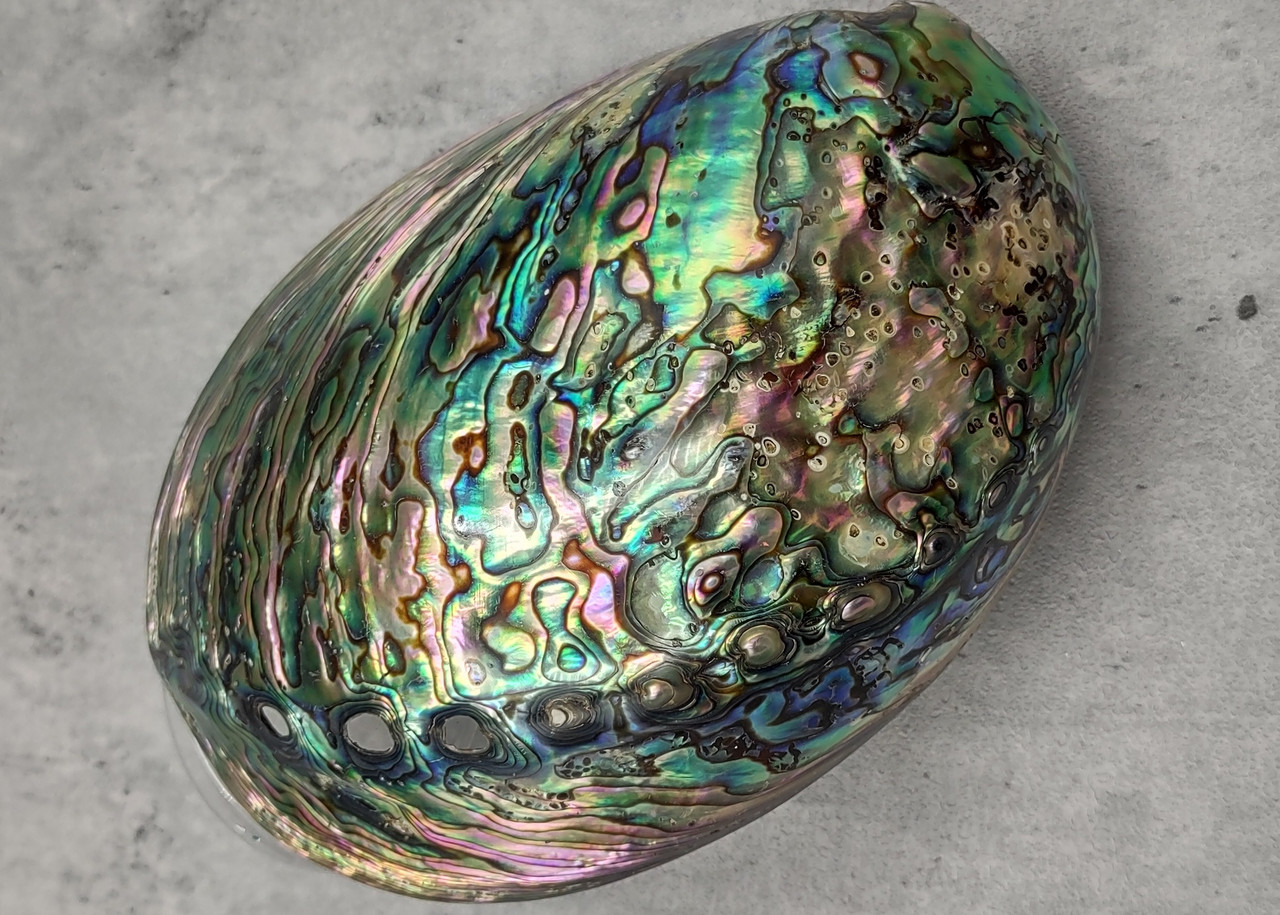

In [101]:
from IPython.display import Image
Image("abalone.jpg", width=200, height=100)

In [102]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import statsmodels.api as sm
from scipy.stats import median_abs_deviation as mad

abalone = pd.read_csv("data/abalone.csv")

models = {
    "Logistic Regression": LogisticRegression(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(max_depth=4,random_state=42),
    "Random Forest": RandomForestClassifier()
}

df = abalone

abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## 1. prepare for classification


In [103]:
#no problem

## 2.Define variable

In [104]:
# F M I

## 3.Train and test

In [105]:

X = abalone.drop('Sex', axis=1)
y = abalone['Sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
import pandas as pd

print("Mean of X_train_scaled: ", np.mean(X_train_scaled))
print("Standard deviation of X_train_scaled: ", np.std(X_train_scaled))


Mean of X_train_scaled:  Length            4.973573e-16
Diameter          1.756884e-16
Height           -2.096829e-16
Whole weight      2.272950e-17
Shucked weight    2.295879e-16
Viscera weight    1.637753e-16
Shell weight      2.163788e-16
Rings            -1.895454e-16
dtype: float64
Standard deviation of X_train_scaled:  Length            1.0
Diameter          1.0
Height            1.0
Whole weight      1.0
Shucked weight    1.0
Viscera weight    1.0
Shell weight      1.0
Rings             1.0
dtype: float64


## 4.Logictic regression,Cross validation

In [106]:

from sklearn.metrics import classification_report, confusion_matrix

model = models['Logistic Regression']
model.fit(X_train_scaled, y_train) 
y_pred = model.predict(X_test_scaled)
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Train Accuracy: 0.5558216102963185
Test Accuracy: 0.583732057416268
Classification Report:
               precision    recall  f1-score   support

           F       0.50      0.38      0.43       262
           I       0.69      0.87      0.76       267
           M       0.52      0.51      0.52       307

    accuracy                           0.58       836
   macro avg       0.57      0.59      0.57       836
weighted avg       0.57      0.58      0.57       836

Confusion Matrix:
 [[100  45 117]
 [ 10 231  26]
 [ 89  61 157]]


c:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=3)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.54219031 0.5475763  0.55615454]
Mean CV Score: 0.548640381369625


## 5.LDA

In [108]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = models['LDA']
lda_model.fit(X_train_scaled, y_train)
train_accuracy = lda_model.score(X_train_scaled, y_train)
test_accuracy = lda_model.score(X_test_scaled, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

y_pred_lda = lda_model.predict(X_test_scaled)
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda,zero_division=1))



Train Accuracy: 0.5495360670457947
Test Accuracy: 0.5454545454545454
LDA Classification Report:
               precision    recall  f1-score   support

           F       0.47      0.37      0.41       262
           I       0.68      0.79      0.73       267
           M       0.46      0.48      0.47       307

    accuracy                           0.55       836
   macro avg       0.54      0.55      0.54       836
weighted avg       0.53      0.55      0.54       836



## 6.QDA

In [109]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = models['QDA']
qda_model.fit(X_train_scaled, y_train)

train_accuracy = qda_model.score(X_train_scaled, y_train)
test_accuracy = qda_model.score(X_test_scaled, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

y_pred_qda = qda_model.predict(X_test_scaled)
print("QDA Classification Report:\n", classification_report(y_test, y_pred_qda,zero_division=1))


Train Accuracy: 0.5333732415444478
Test Accuracy: 0.5526315789473685
QDA Classification Report:
               precision    recall  f1-score   support

           F       0.52      0.32      0.39       262
           I       0.60      0.88      0.71       267
           M       0.51      0.47      0.49       307

    accuracy                           0.55       836
   macro avg       0.54      0.56      0.53       836
weighted avg       0.54      0.55      0.53       836



## 7.Decision tree

Train Accuracy: 0.5713858126309488
Test Accuracy: 0.5717703349282297
Decition Tree Classification Report:
               precision    recall  f1-score   support

           F       1.00      0.00      0.00       262
           I       1.00      0.00      0.00       267
           M       0.37      1.00      0.54       307

    accuracy                           0.37       836
   macro avg       0.79      0.33      0.18       836
weighted avg       0.77      0.37      0.20       836

Confusion Matrix:
 [[100  45 117]
 [ 10 231  26]
 [ 89  61 157]]


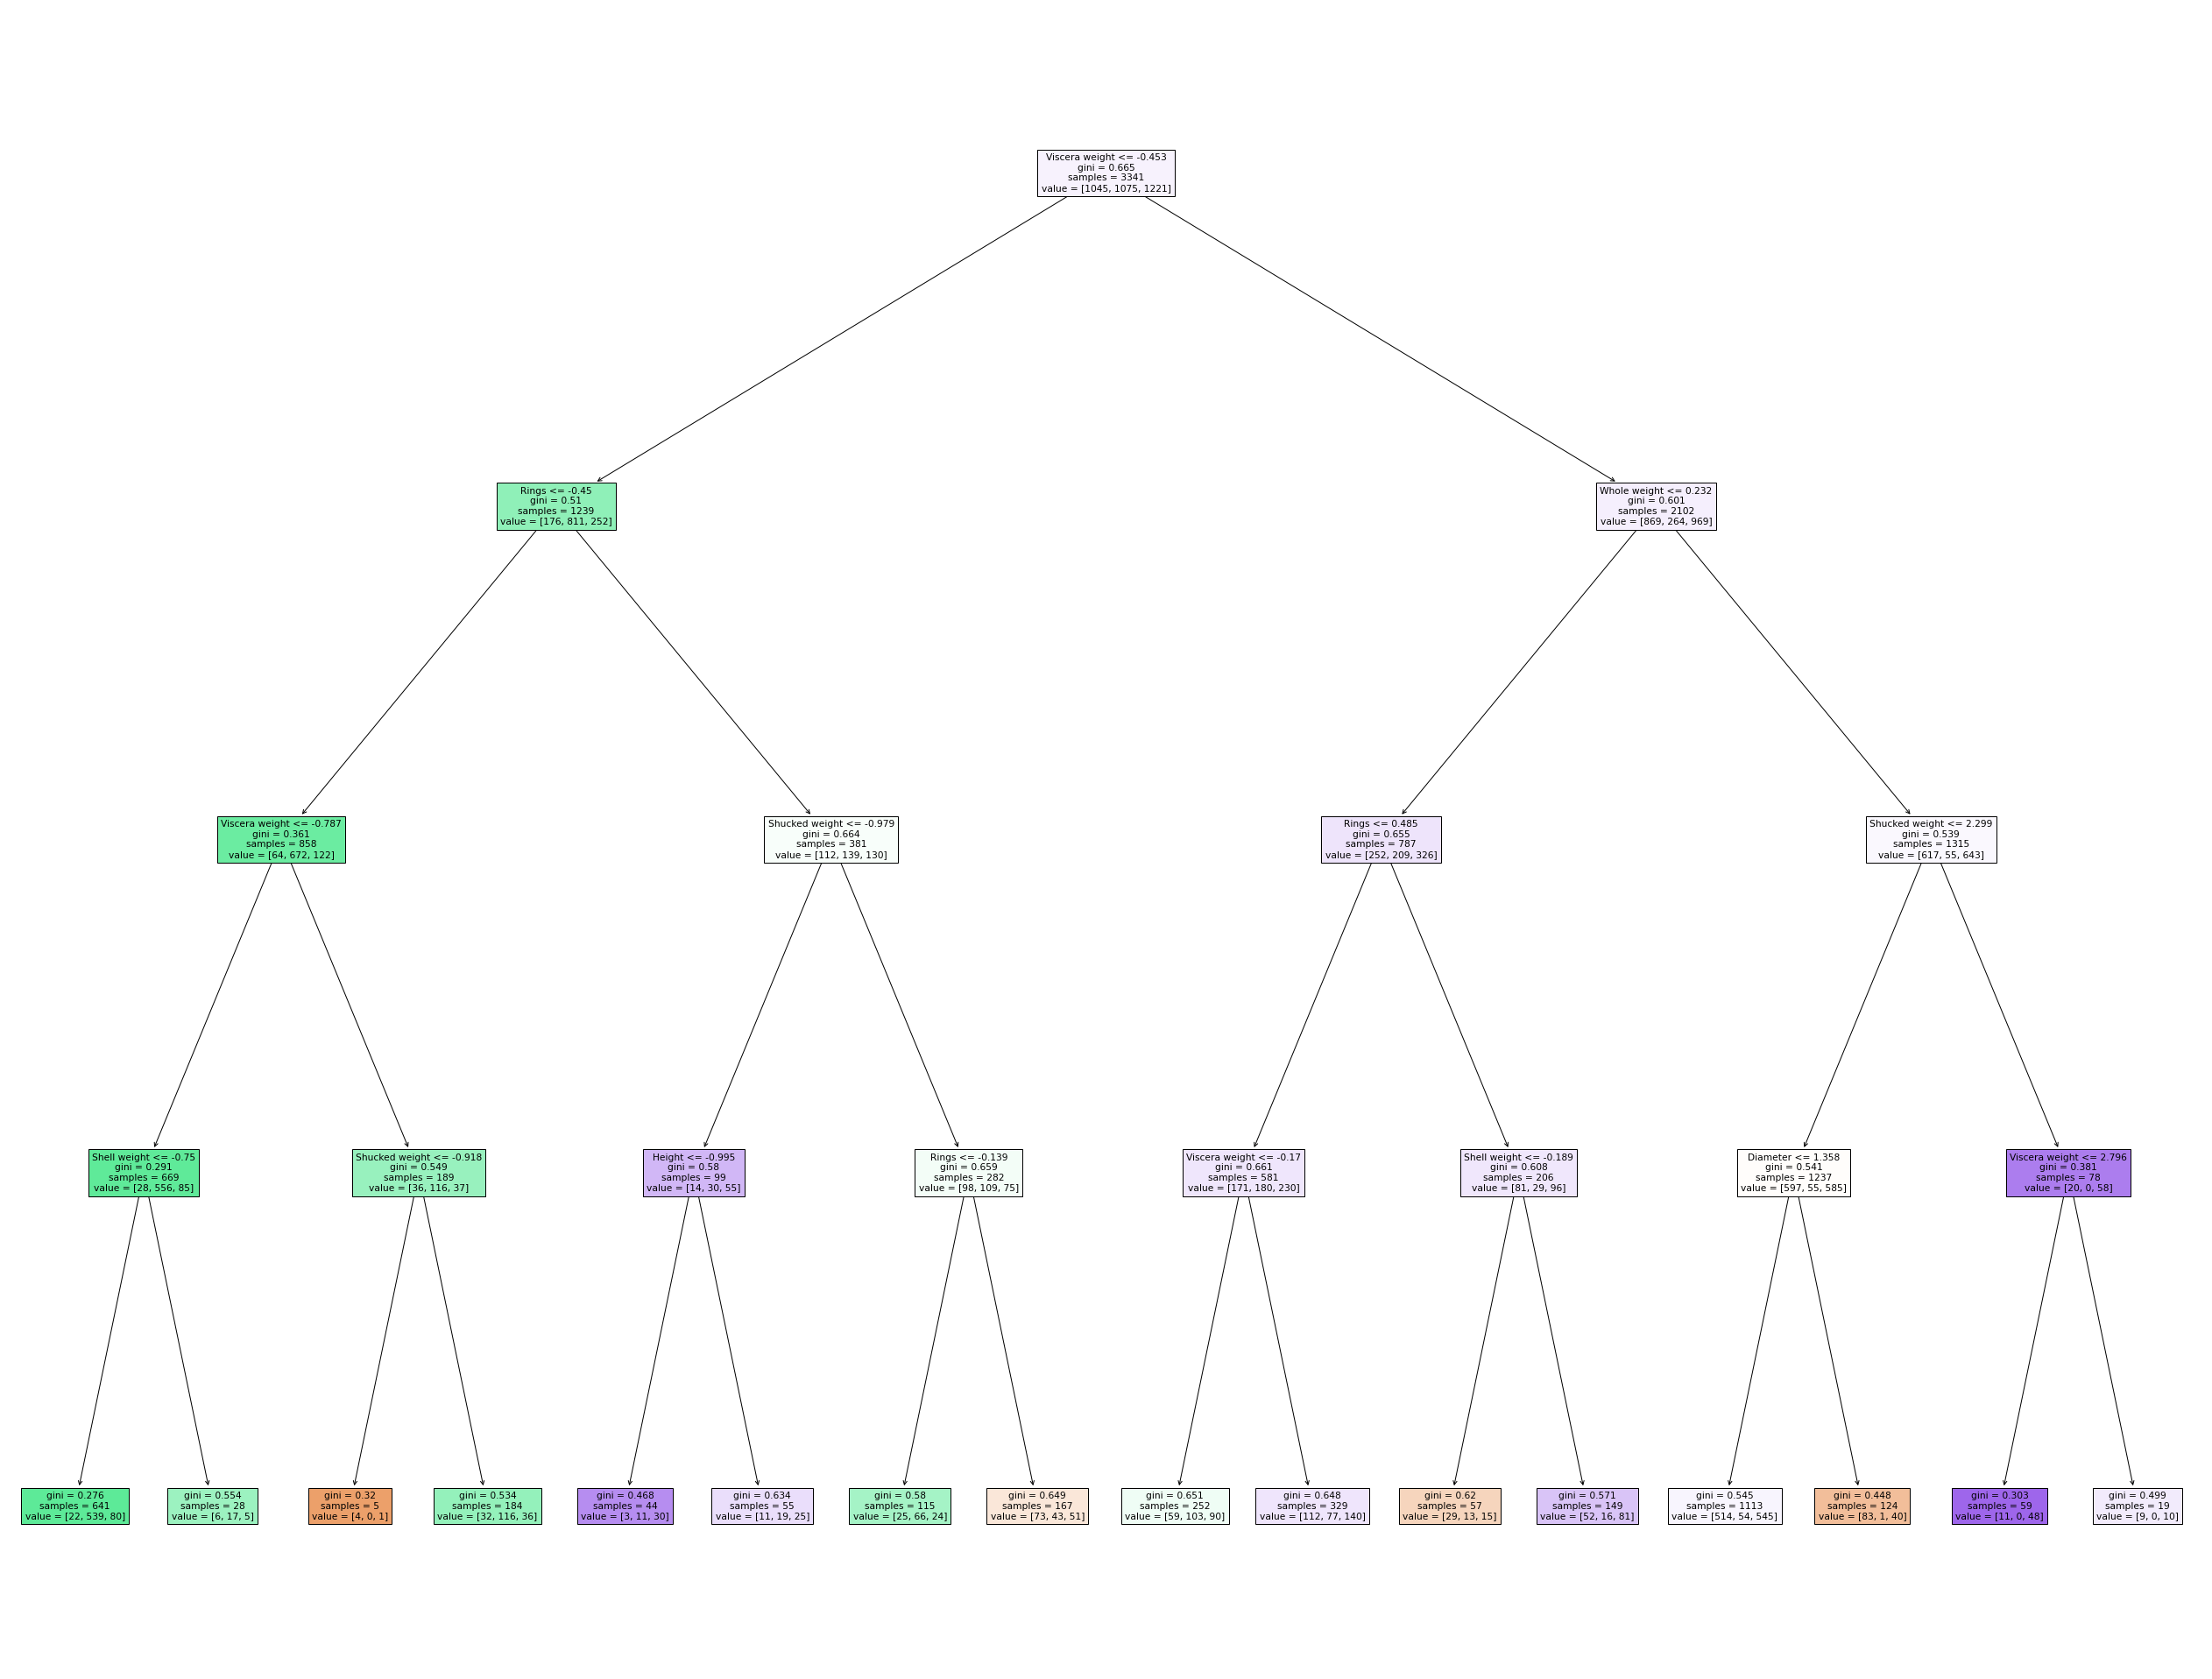

In [117]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

dc_model = models['Decision Tree']
dc_model.fit(X_train_scaled, y_train)

yp_model = dc_model.predict(X_test)
train_accuracy = dc_model.score(X_train_scaled, y_train)
test_accuracy = dc_model.score(X_test_scaled, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Decition Tree Classification Report:\n", classification_report(y_test, yp_model,zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(45, 35))
plot_tree(dc_model, filled=True,feature_names=X_train.columns)
plt.show()



## 8.Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf_model = models['Random Forest']
rf_model.fit(X_train_scaled, y_train)


y_pred_rf = rf_model.predict(X_test_scaled)
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf,zero_division=1))


Train Accuracy: 0.5558216102963185
Test Accuracy: 0.583732057416268
Random Forest Classification Report:
               precision    recall  f1-score   support

           F       0.46      0.40      0.43       262
           I       0.73      0.76      0.74       267
           M       0.47      0.50      0.49       307

    accuracy                           0.55       836
   macro avg       0.55      0.56      0.55       836
weighted avg       0.55      0.55      0.55       836



## 9.Final result

In [115]:
results = []

for name, model in models.items():
    result = {}
    result['Name'] = name
    result['Train Score'] = model.score(X_train_scaled, y_train)
    result['Test Score'] = model.score(X_test_scaled, y_test)
    result['CV Score'] = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()
    results.append(result)

results_df = pd.DataFrame(results)

print(results_df)


                  Name  Train Score  Test Score  CV Score
0  Logistic Regression     0.555822    0.583732  0.552534
1                  LDA     0.549536    0.545455  0.550140
2                  QDA     0.533373    0.552632  0.524996
3        Decision Tree     0.571386    0.571770  0.544751
4        Random Forest     1.000000    0.553828  0.540562


## 10.Feature importance

In [116]:
importances = model.feature_importances_

feature_importances = pd.DataFrame({"feature": abalone.drop('Sex', axis=1).columns, "importance": importances})

feature_importances = feature_importances.sort_values("importance", ascending=False)

print(feature_importances)


          feature  importance
5  Viscera weight    0.178705
3    Whole weight    0.157928
6    Shell weight    0.149008
4  Shucked weight    0.131460
1        Diameter    0.098682
0          Length    0.097623
7           Rings    0.093647
2          Height    0.092946
